# Clustering using K-means and applying PCA on Credit Card Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from sklearn.cluster import KMeans

sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('credit card.csv')
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# 1 handling Null values

# Lets find/count null values in each column

In [4]:
nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[:])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
CUST_ID                                    0
BALANCE                                    0
PRC_FULL_PAYMENT                           0
PAYMENTS                                   0
PURCHASES_TRX                              0
CASH_ADVANCE_TRX                           0
CASH_ADVANCE_FREQUENCY                     0
PURCHASES_INSTALLMENTS_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_FREQUENCY                        0
CASH_ADVANCE                               0
INSTALLMENTS_PURCHASES                     0
ONEOFF_PURCHASES                           0
PURCHASES                                  0
BALANCE_FREQUENCY                          0
TENURE                                     0


In [5]:
dataset['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

#  Finding mean values for MINIMUM_PAYMENTS

In [6]:
mean_value = dataset['MINIMUM_PAYMENTS'].mean()

In [7]:
dataset['MINIMUM_PAYMENTS'].fillna(value = mean_value, inplace=True)

In [8]:
nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[:])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                                  Null Count
Feature                                     
CREDIT_LIMIT                               1
CUST_ID                                    0
BALANCE                                    0
PRC_FULL_PAYMENT                           0
MINIMUM_PAYMENTS                           0
PAYMENTS                                   0
PURCHASES_TRX                              0
CASH_ADVANCE_TRX                           0
CASH_ADVANCE_FREQUENCY                     0
PURCHASES_INSTALLMENTS_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_FREQUENCY                        0
CASH_ADVANCE                               0
INSTALLMENTS_PURCHASES                     0
ONEOFF_PURCHASES                           0
PURCHASES                                  0
BALANCE_FREQUENCY                          0
TENURE                                     0


In [9]:
dataset['CREDIT_LIMIT']

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

In [10]:
mean_value_cl = dataset['CREDIT_LIMIT'].mean()

In [11]:
dataset['CREDIT_LIMIT'].fillna(value = mean_value_cl, inplace=True)

In [12]:
nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[:])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                                  Null Count
Feature                                     
CUST_ID                                    0
BALANCE                                    0
PRC_FULL_PAYMENT                           0
MINIMUM_PAYMENTS                           0
PAYMENTS                                   0
CREDIT_LIMIT                               0
PURCHASES_TRX                              0
CASH_ADVANCE_TRX                           0
CASH_ADVANCE_FREQUENCY                     0
PURCHASES_INSTALLMENTS_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_FREQUENCY                        0
CASH_ADVANCE                               0
INSTALLMENTS_PURCHASES                     0
ONEOFF_PURCHASES                           0
PURCHASES                                  0
BALANCE_FREQUENCY                          0
TENURE                                     0


#  elbow method to find a good number of clusters with the K-Means algorithm

In [13]:
X = dataset.iloc[:,1:]
X = X.select_dtypes(include=[np.number]).interpolate().fillna(X.select_dtypes(include=[np.number]).interpolate().mean(axis=0))

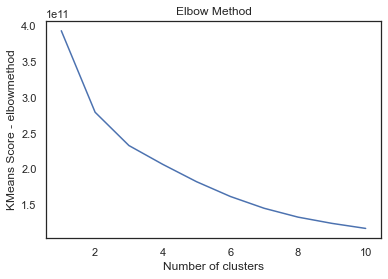

In [16]:
elbowmethod = []
for i in range(1, 11):
  km=KMeans(n_clusters=i,random_state=42)
  km.fit(X)
  elbowmethod.append(km.inertia_)
plt.plot(range(1, 11), elbowmethod)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('KMeans Score - elbowmethod')
plt.show()

# Found that 3 is the optimal number of clusters 

# Calculating the silhouette score 

In [17]:
# Calculating the silhouette score  
from sklearn import metrics
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)
y_clst_km = km.predict(X)
silhouette_score = metrics.silhouette_score(X, y_clst_km)
silhouette_score

0.4676551448676235

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler as SS

In [19]:
Standards = SS()
Standards.fit(X)
X_Fscaled = Standards.transform(X) #feature Scaling

# Applying the Clustring - KMeans algorithm on the feature Scaling data

In [20]:
fscaled_k_means = KMeans(n_clusters=3, random_state=42)
fscaled_k_means.fit(X_Fscaled)
y_scaled_k_means = fscaled_k_means.predict(X_Fscaled)

In [21]:
fscaled_silhouette_score=metrics.silhouette_score(X,y_scaled_k_means)
fscaled_silhouette_score

0.3416041713221693

# The silhouette score got better 

# Apply PCA on the same dataset then apply K-Means algorithm on the PCA result and report your observation if the silhouette score improved or not.


In [22]:
# Applying the PCA on the data.
from sklearn.decomposition import PCA as PC
pca=PC(3)
X_pca=pca.fit_transform(X)


In [23]:
# Applying KMeans Algorithm on the PCA results

k_means_pca=KMeans(n_clusters=3)
k_means_pca.fit(X_pca)
y_pca_k_means=k_means_pca.predict(X_pca)
pca_silhouette_score =metrics.silhouette_score(X_pca, y_pca_k_means)

In [24]:
pca_silhouette_score

0.5107737691383185

In [27]:
# The KMeans model after applying a PCA on the Scaled data.

pca_scaled=PC(2)
X_pca_scaled=pca_scaled.fit_transform(X_Fscaled)

k_means_pca_sc=KMeans(n_clusters=3)
k_means_pca_sc.fit(X_pca_scaled)
y_pca_k_means_sc=k_means_pca_sc.predict(X_pca_scaled)
pca_scaled_score=metrics.silhouette_score(X_pca_scaled, y_pca_k_means_sc)
y_pca_k_means_sc
pca_scaled_score

0.45238439124593566

In [28]:
#Apply PCA on the same dataset and K-Means algorithm on the PCA result and report of observation the silhouette score

print('S_score Before Scaling :',silhouette_score)
print('S_score After feature Scaling :',fscaled_silhouette_score)
print('S_score After applying PCA:',pca_scaled_score)

S_score Before Scaling : 0.4676551448676235
S_score After feature Scaling : 0.3416041713221693
S_score After applying PCA: 0.45238439124593566


# The silhouette score improved

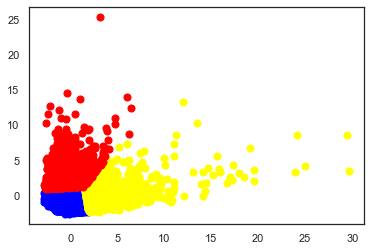

In [29]:
#Visualize the clustering

col=['blue','yellow','red']
for i in range(3):
  x_axis=X_pca_scaled[y_pca_k_means_sc == i][:,0]
  y_axis=X_pca_scaled[y_pca_k_means_sc == i][:,1]
  plt.scatter(x_axis,y_axis,color=col[i], s=50)
plt.show()